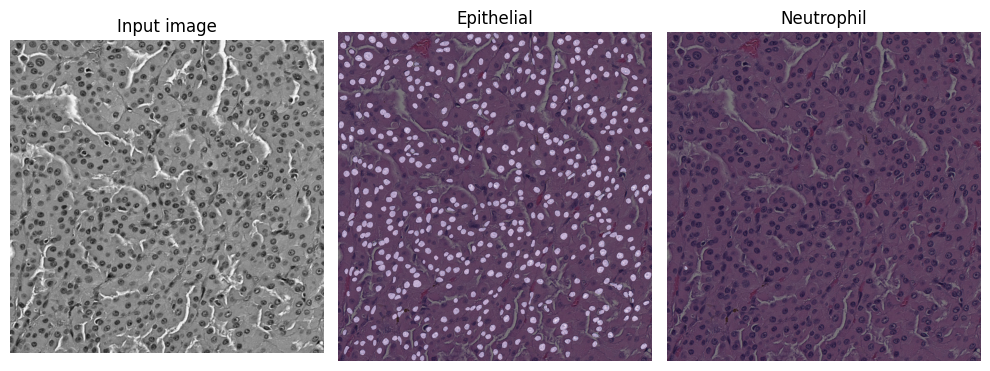

In [1]:
from src.dataset import MoNuSACDataset
from src.constants import NAME_CLASS_MAPPING
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt

class_idx_name_mapping = {i: c for (i, c) in enumerate(NAME_CLASS_MAPPING)}

dataset = MoNuSACDataset(root="./data/train/masks")
img, mask_imgs = dataset.__getitem__(1)

masks_to_show = []

for i, mask in enumerate(mask_imgs):
    mask_array = np.array(mask)

    if not np.all(mask_array == 0):
        masks_to_show.append(i)

_, axes = plt.subplots(1, len(masks_to_show) + 1, figsize=(10, 15))

axes[0].imshow(TF.resize(TF.to_tensor(TF.to_grayscale(img)), [512, 512]).squeeze(0), cmap="grey")
axes[0].axis("off")
axes[0].set_title("Input image")

for i, mask_idx in enumerate(masks_to_show):
    axes[i + 1].imshow(img)
    axes[i + 1].imshow(TF.to_tensor(mask_imgs[mask_idx]).squeeze(0), alpha=0.5, cmap="grey")
    axes[i + 1].axis("off")
    axes[i + 1].set_title(class_idx_name_mapping[mask_idx])

plt.tight_layout()
plt.show()


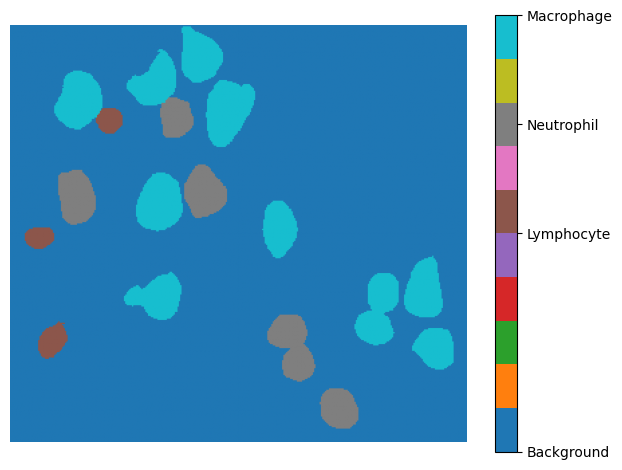

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.constants import NAME_CLASS_MAPPING

img = cv2.imread("/home/mukesh/dev/MoNuSAC/data/train/masks/TCGA-V1-A9O9-01Z-00-DX1/4/out.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    exit(1)

plt.imshow(img, cmap="tab10", vmin=0, vmax=4)
plt.axis("off")

cbar = plt.colorbar()
class_names = ['Background'] + list(NAME_CLASS_MAPPING)[:-1]
unique_vals = np.unique(img)

cbar.set_ticks(unique_vals.tolist()) 
cbar.set_ticklabels([class_names[i] for i in unique_vals])

plt.tight_layout()
plt.show()